# Github Repo Classification


In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import sklearn

import sys
import os

from main import normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

## Data Aggregation

In [2]:
def aggregate_data(repo_links):
    metrics_data = []
    for link in repo_links:
        github_metrics = GithubMetrics(link)
        metrics_data.append([link] + [github_metrics.get(m) for m in metrics])

    return pd.DataFrame(data=metrics_data, columns=['repo'] + metrics)

In [3]:
importer = DatasetImporter('data/testset.csv')
X_unnorm = importer.data
y = importer.target
X = normalize_data(X_unnorm)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

X[:5]

avg_folder_depth  pdf_count  png_count  repo_size  up_to_dateness  \
0          0.253733   0.000000   0.008444   0.752535        0.000086   
1          0.333086   0.000000   0.000000   0.369789        0.043897   
2          0.236519   0.314454   0.125589   0.734472        0.015705   
3          0.736634   0.000000   0.000000   0.373389        0.008122   
4          0.534729   0.000000   0.078354   0.508392        0.251397   

   file_folder_ratio  hw_terminology_commits  hw_terminology_files  \
0           0.330250                0.631514              0.000000   
1           0.086028                0.000000              0.000000   
2           0.274775                0.360522              0.000000   
3           0.169127                0.000000              0.195343   
4           0.209958                0.088202              0.000000   

   html_count  doc_terms_in_readme  is_io_page  avg_entropy  watcher_count  \
0    0.000000             0.079104         0.0     0.286807       0.772247   
1    0.000000             0.000000         0.0     0.284243       0.752640   
2    0.328676             0.222073         0.0     0.445036       0.000000   
3    0.000000             0.347449         0.0     0.270876       0.000000   
4    0.000000             0.125377         0.0     0.293983       0.000000   

   md_count  doc_in_description_or_title  file_count  edu_mail_ratio  \
0  0.187607                          0.0    0.405086        0.007613   
1  0.230062                          0.0    0.138886        0.000000   
2  0.302638                          0.0    0.484467        0.016060   
3  0.415712                          0.0    0.344582        0.000000   
4  0.217729                          0.0    0.349585        0.034765   

   open_issue_count  forks_count  
0          0.639894     0.568263  
1          0.151507     0.534210  
2          0.000000     0.000000  
3          0.000000     0.000000  
4          0.000000     0.000000

In [4]:
X_unnorm[:5]

avg_folder_depth  pdf_count  png_count  repo_size  up_to_dateness  \
0          2.250000   0.000000   0.004777      77702    2.605221e+04   
1          2.625000   0.000000   0.000000        252    1.104032e+07   
2          2.173913   0.220352   0.073451      59299    3.952726e+06   
3          5.316667   0.000000   0.000000        266    2.046372e+06   
4          3.784314   0.000000   0.045213       2012    6.320647e+07   

   file_folder_ratio  hw_terminology_commits  hw_terminology_files  \
0           9.661538                     142                     0   
1           2.120000                       0                     0   
2           7.064865                      16                     0   
3           3.739583                       0                     2   
4           4.820513                       1                     0   

   html_count  doc_terms_in_readme  is_io_page  avg_entropy  watcher_count  \
0           0                    1           0     0.607567           4769   
1           0                    0           0     0.606200           3846   
2          33                    6           0     0.691902              0   
3           0                   20           0     0.599076              0   
4           0                    2           0     0.611392              0   

   md_count  doc_in_description_or_title  file_count  edu_mail_ratio  \
0       5.0                            0         628        0.005291   
1       8.0                            0          53        0.000000   
2      17.0                            0        1307        0.011194   
3      52.0                            0         359        0.000000   
4       7.0                            0         376        0.024390   

   open_issue_count  forks_count  
0               348          646  
1                 3          438  
2                 0            0  
3                 0            0  
4                 0            0

## Visualizations

we want to compare stuff

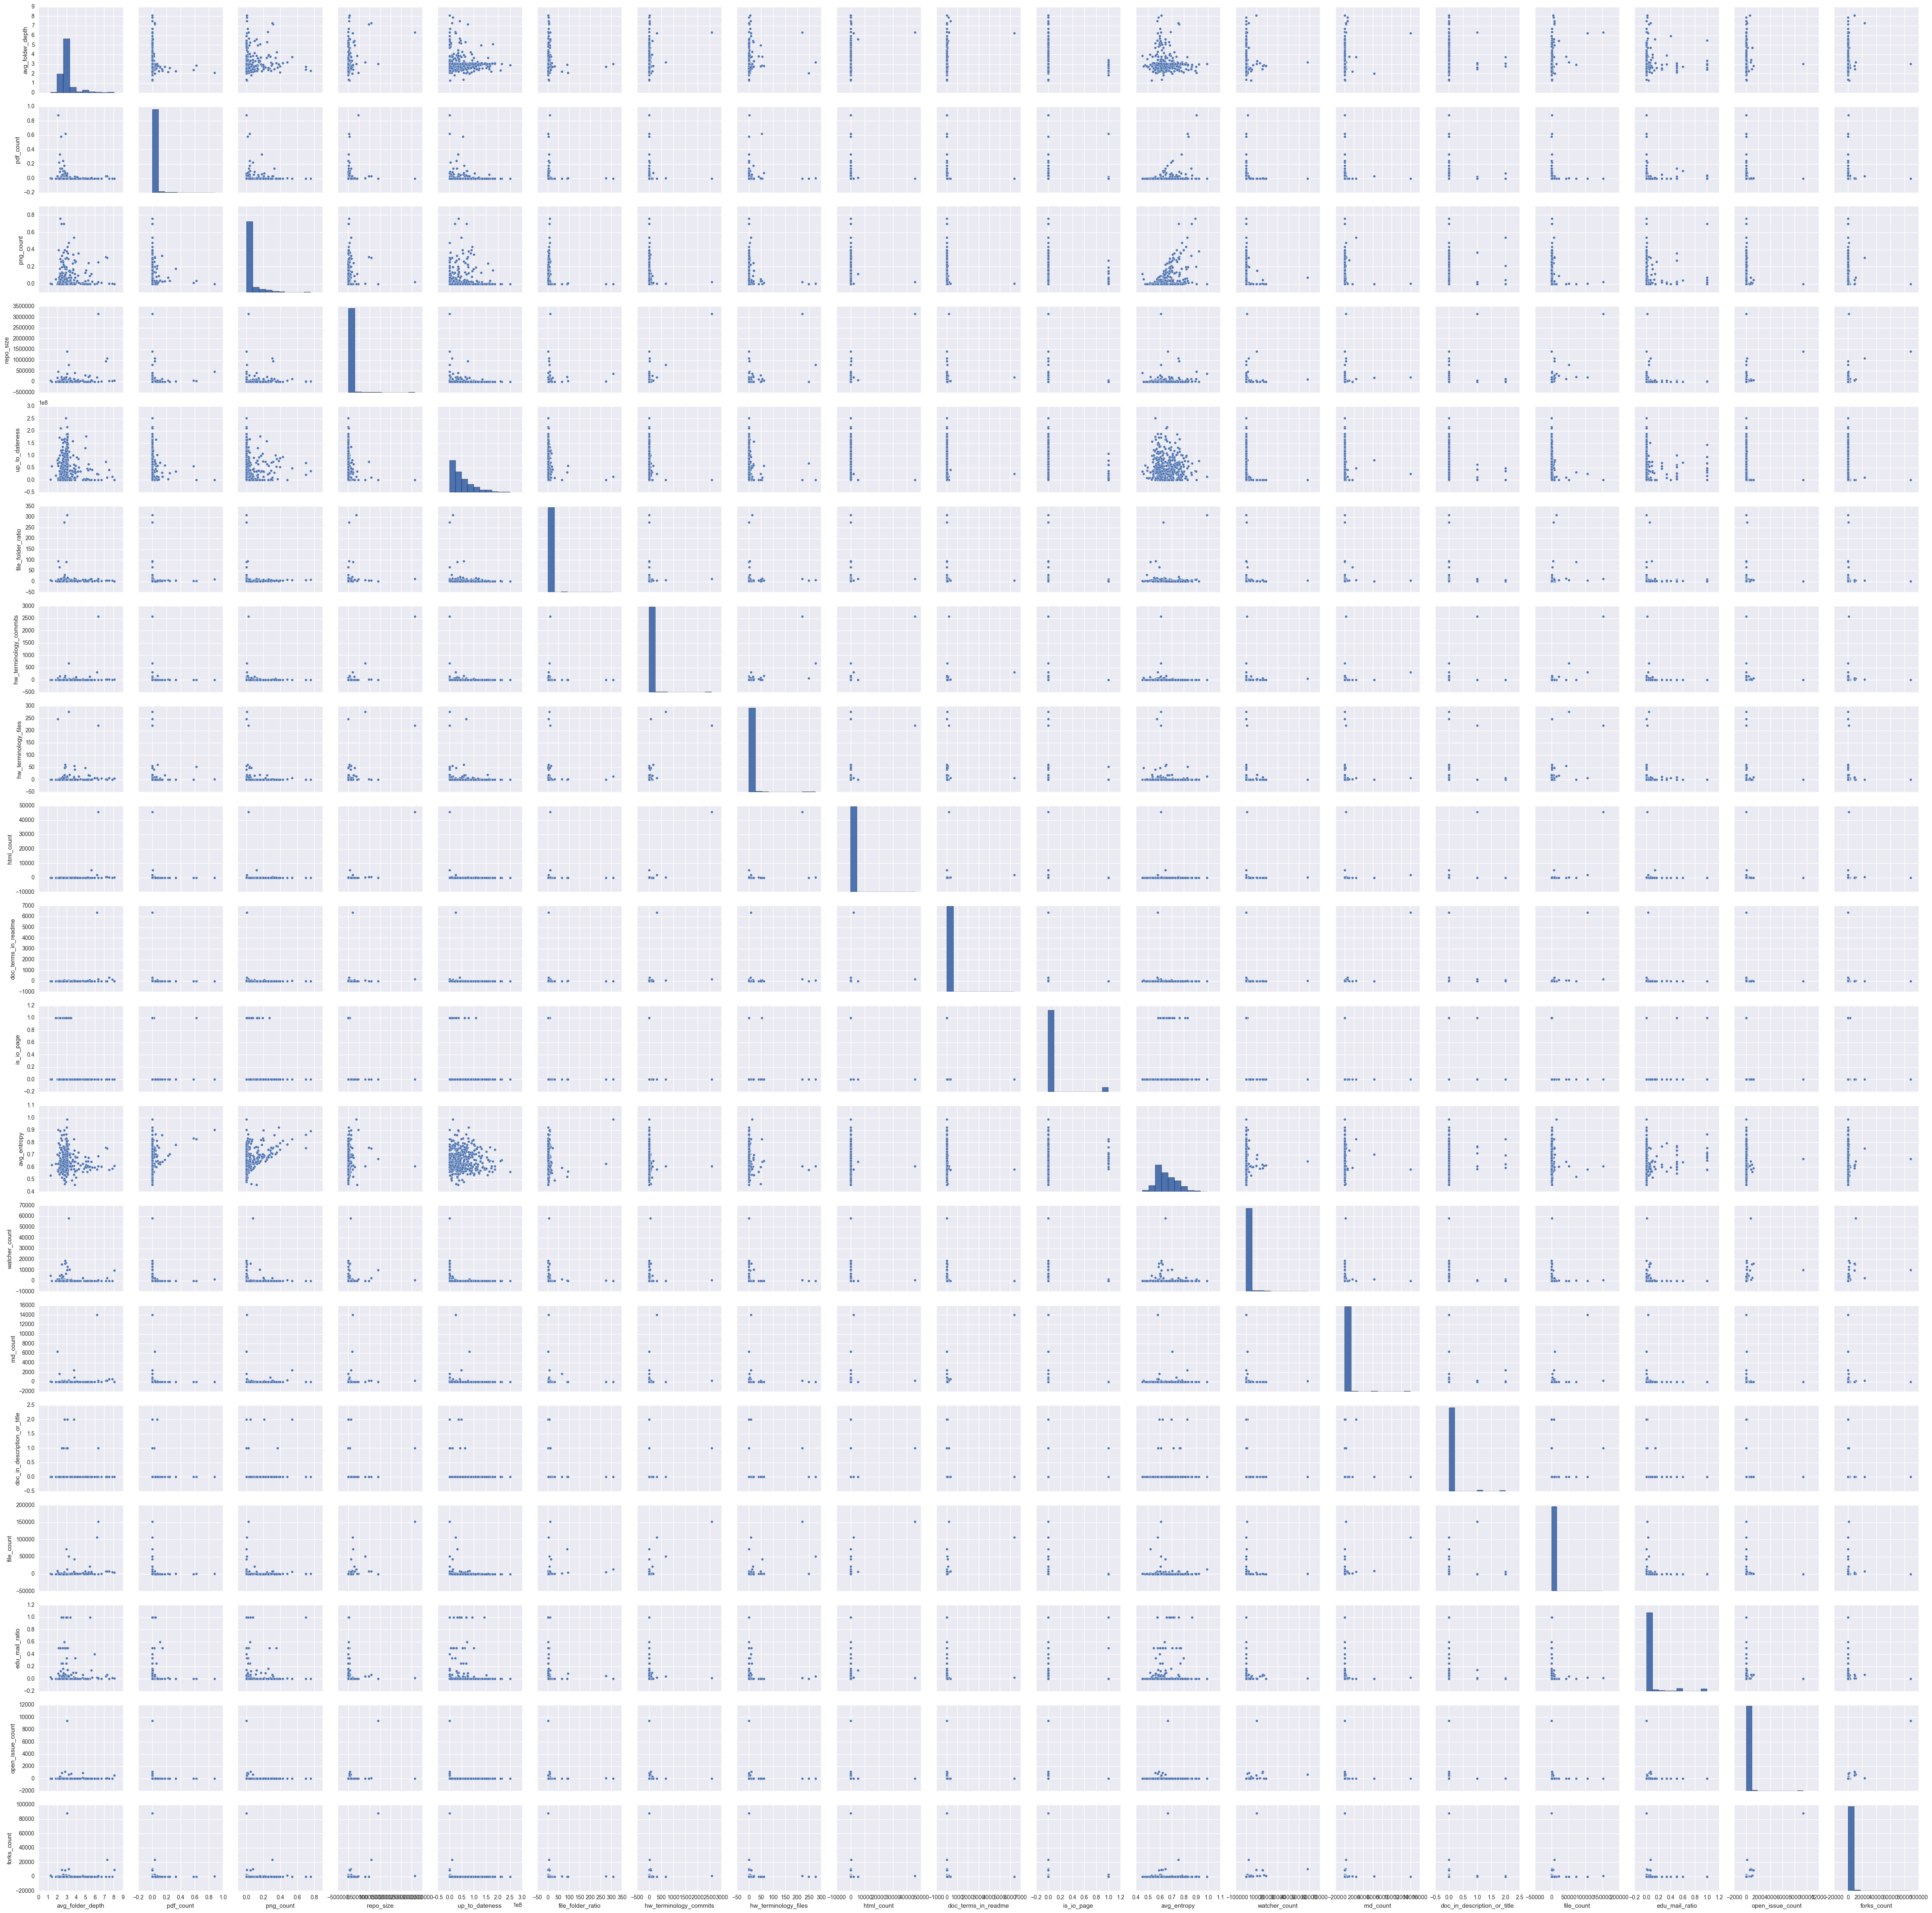

In [5]:
std_scaler = sklearn.preprocessing.StandardScaler()
sbn.pairplot(X_unnorm)

In [6]:
metric_list = list(metricCollection.keys())

In [20]:
X[X['doc_in_description_or_title'] > 0.0]

avg_folder_depth  pdf_count  png_count  repo_size  up_to_dateness  \
33           0.358570   0.104612   0.336154   0.723459        0.000072   
36           0.398979   0.042970   0.012178   0.388151        0.047549   
65           0.360565   0.000000   0.083727   0.587412        0.002767   
77           0.399093   0.032559   0.000000   0.518821        0.254247   
88           0.307586   0.000000   0.012434   0.535809        0.175344   
158          0.422563   0.000000   0.000000   0.264057        0.001107   
172          0.422563   0.000000   0.000000   0.264057        0.001107   
182          0.336656   0.000000   0.552442   0.740039        0.016183   
251          0.844317   0.000042   0.038265   1.000000        0.000014   
278          0.415886   0.000000   0.000000   0.000000        0.149252   
417          0.531387   0.000000   0.765120   0.784100        0.192220   

     file_folder_ratio  hw_terminology_commits  hw_terminology_files  \
33            0.140626                0.088202              0.000000   
36            0.029072                0.000000              0.000000   
65            0.096952                0.000000              0.000000   
77            0.013929                0.000000              0.000000   
88            0.383097                0.247614              0.000000   
158           0.046365                0.000000              0.000000   
172           0.046365                0.000000              0.000000   
182           0.227194                0.293000              0.123248   
251           0.365304                1.000000              0.960644   
278           0.017342                0.000000              0.000000   
417           0.262893                0.000000              0.390686   

     html_count  doc_terms_in_readme  is_io_page  avg_entropy  watcher_count  \
33     0.000000             0.513531         0.0     0.450093       0.648825   
36     0.000000             0.000000         0.0     0.576102       0.396039   
65     0.000000             0.000000         0.0     0.315866       0.458641   
77     0.064605             0.000000         1.0     0.483362       0.063196   
88     0.000000             0.158208         0.0     0.245624       0.000000   
158    0.000000             0.000000         0.0     0.243185       0.246902   
172    0.000000             0.000000         0.0     0.243185       0.246902   
182    0.064605             0.000000         0.0     0.585882       0.277579   
251    1.000000             0.604087         0.0     0.285617       0.610252   
278    0.000000             0.000000         0.0     0.262677       0.000000   
417    0.167002             0.292719         0.0     0.698401       0.000000   

     md_count  doc_in_description_or_title  file_count  edu_mail_ratio  \
33   0.518903                      1.00000    0.322253        0.019629   
36   0.072576                      0.63093    0.246728        0.000000   
65   0.145153                      1.00000    0.155600        0.000000   
77   0.072576                      0.63093    0.128351        0.000000   
88   0.576012                      0.63093    0.319252        0.010124   
158  0.168517                      0.63093    0.071479        0.192645   
172  0.168517                      0.63093    0.071479        0.192645   
182  0.072576                      0.63093    0.229019        0.000000   
251  0.568022                      0.63093    1.000000        0.016547   
278  0.072576                      1.00000    0.075155        0.000000   
417  0.815512                      1.00000    0.668168        0.000000   

     open_issue_count  forks_count      y  
33           0.516651     0.572759   DOCS  
36           0.075753     0.237763  OTHER  
65           0.403154     0.317033    DEV  
77           0.000000     0.000000   DOCS  
88           0.000000     0.000000   DOCS  
158          0.075753     0.182572   DOCS  
172          0.075753     0.182572   DOCS  
182          0.227260     0.275292    DEV  
251  

In [17]:
def boxplots(data, y_data):
    h = math.ceil(len(metric_list) / 2)
    fig, axes = plt.subplots(nrows=h, ncols=2, figsize=(16, 40))
    for i, metric in enumerate(metric_list):
        x = i % 2
        y = int(i / 2)
        data_per_metric = data[metric]
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        axes[y, x].boxplot(data_per_class, labels=classes, sym='rx')
        axes[y, x].set_title(metric)
        axes[y, x].set_ylim([-0.2, 1.1])

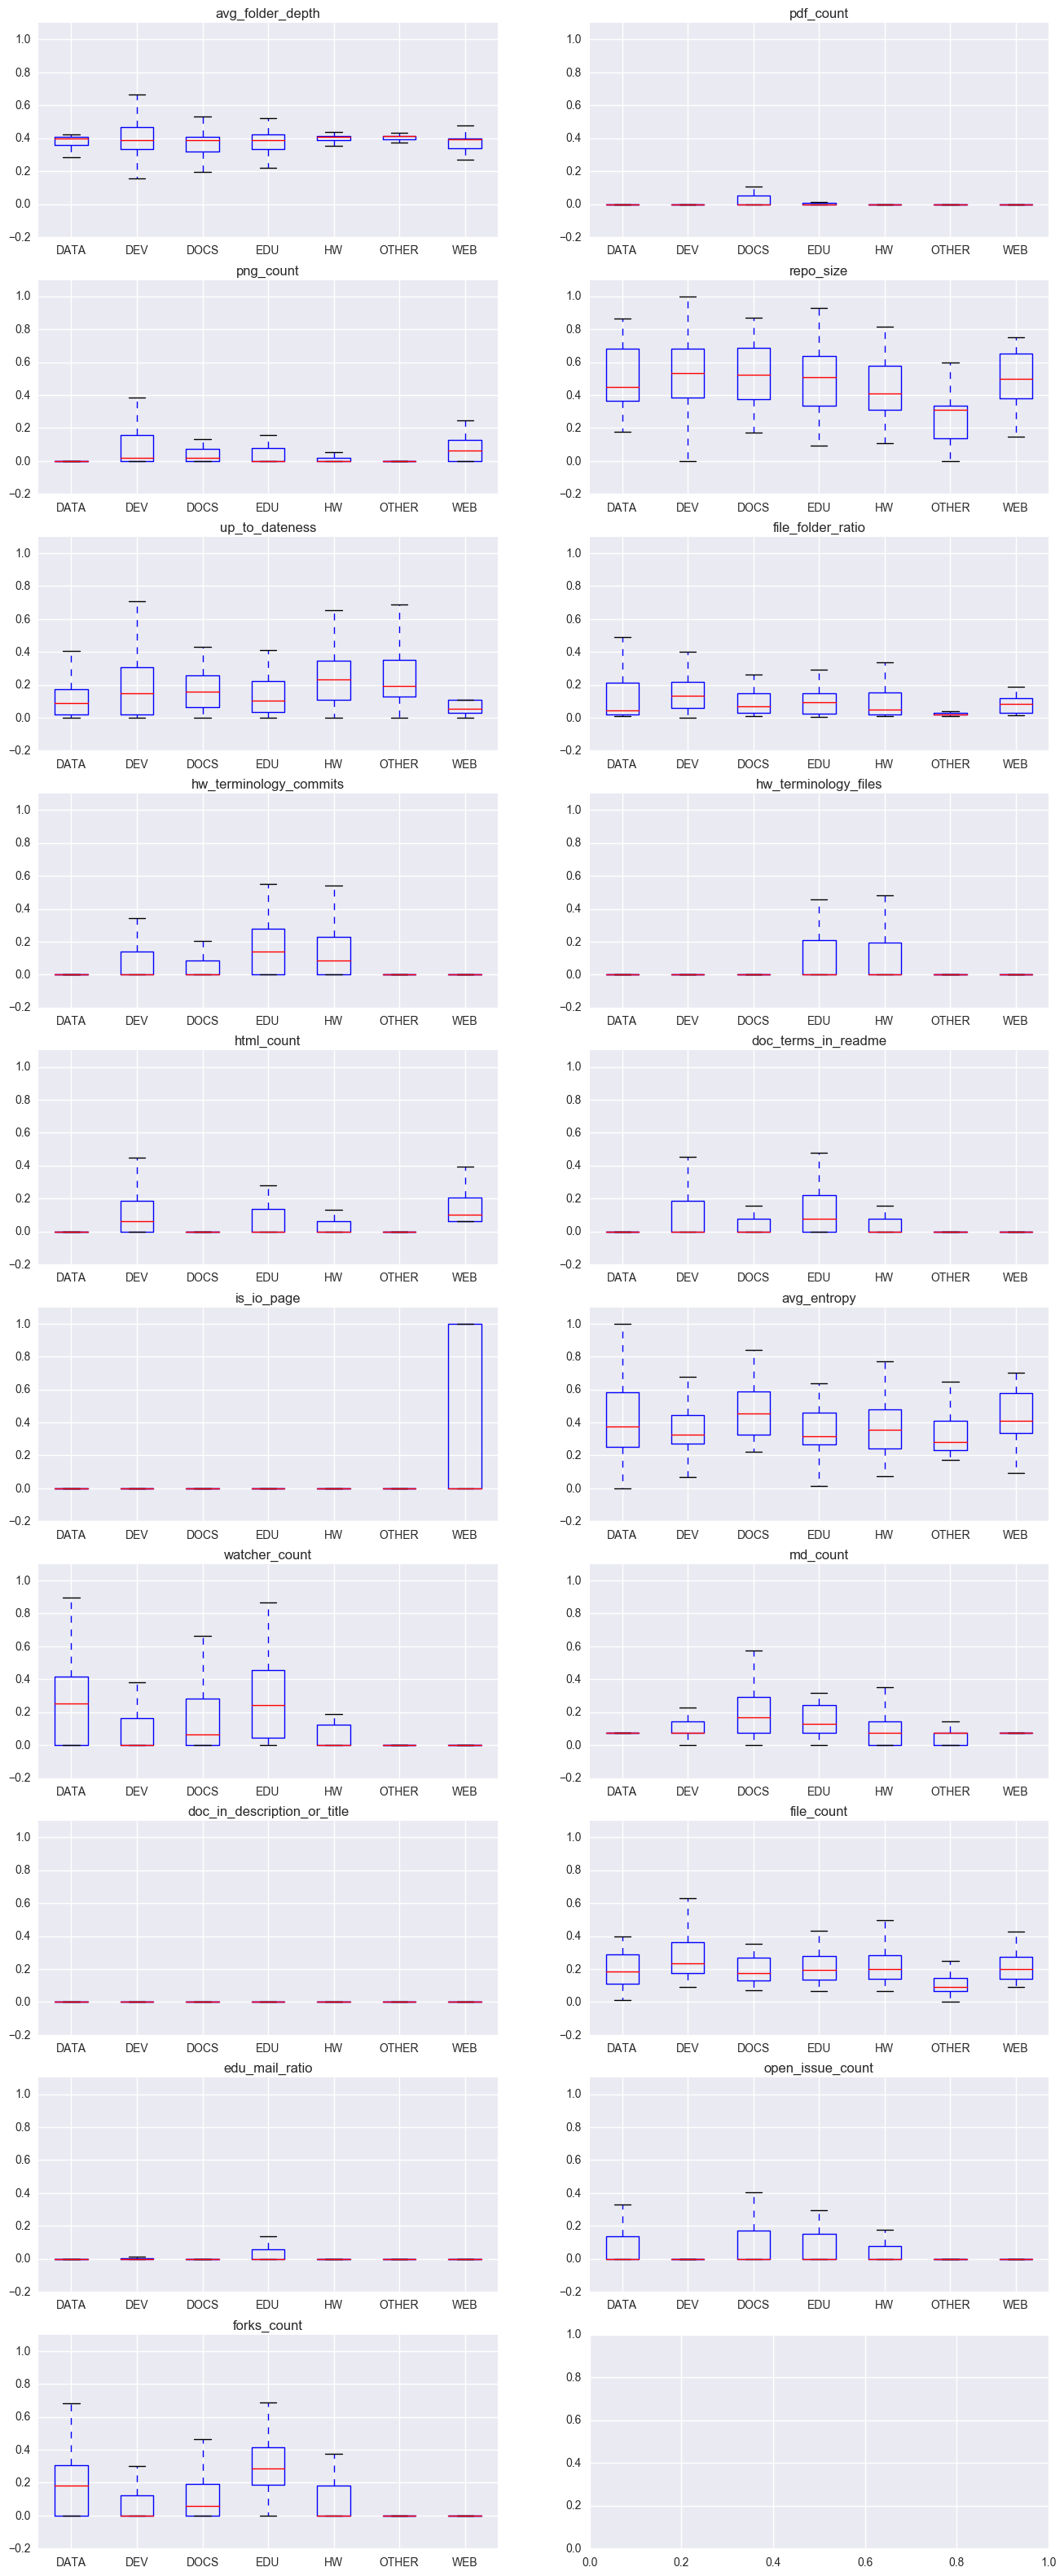

In [18]:
boxplots(X, y)

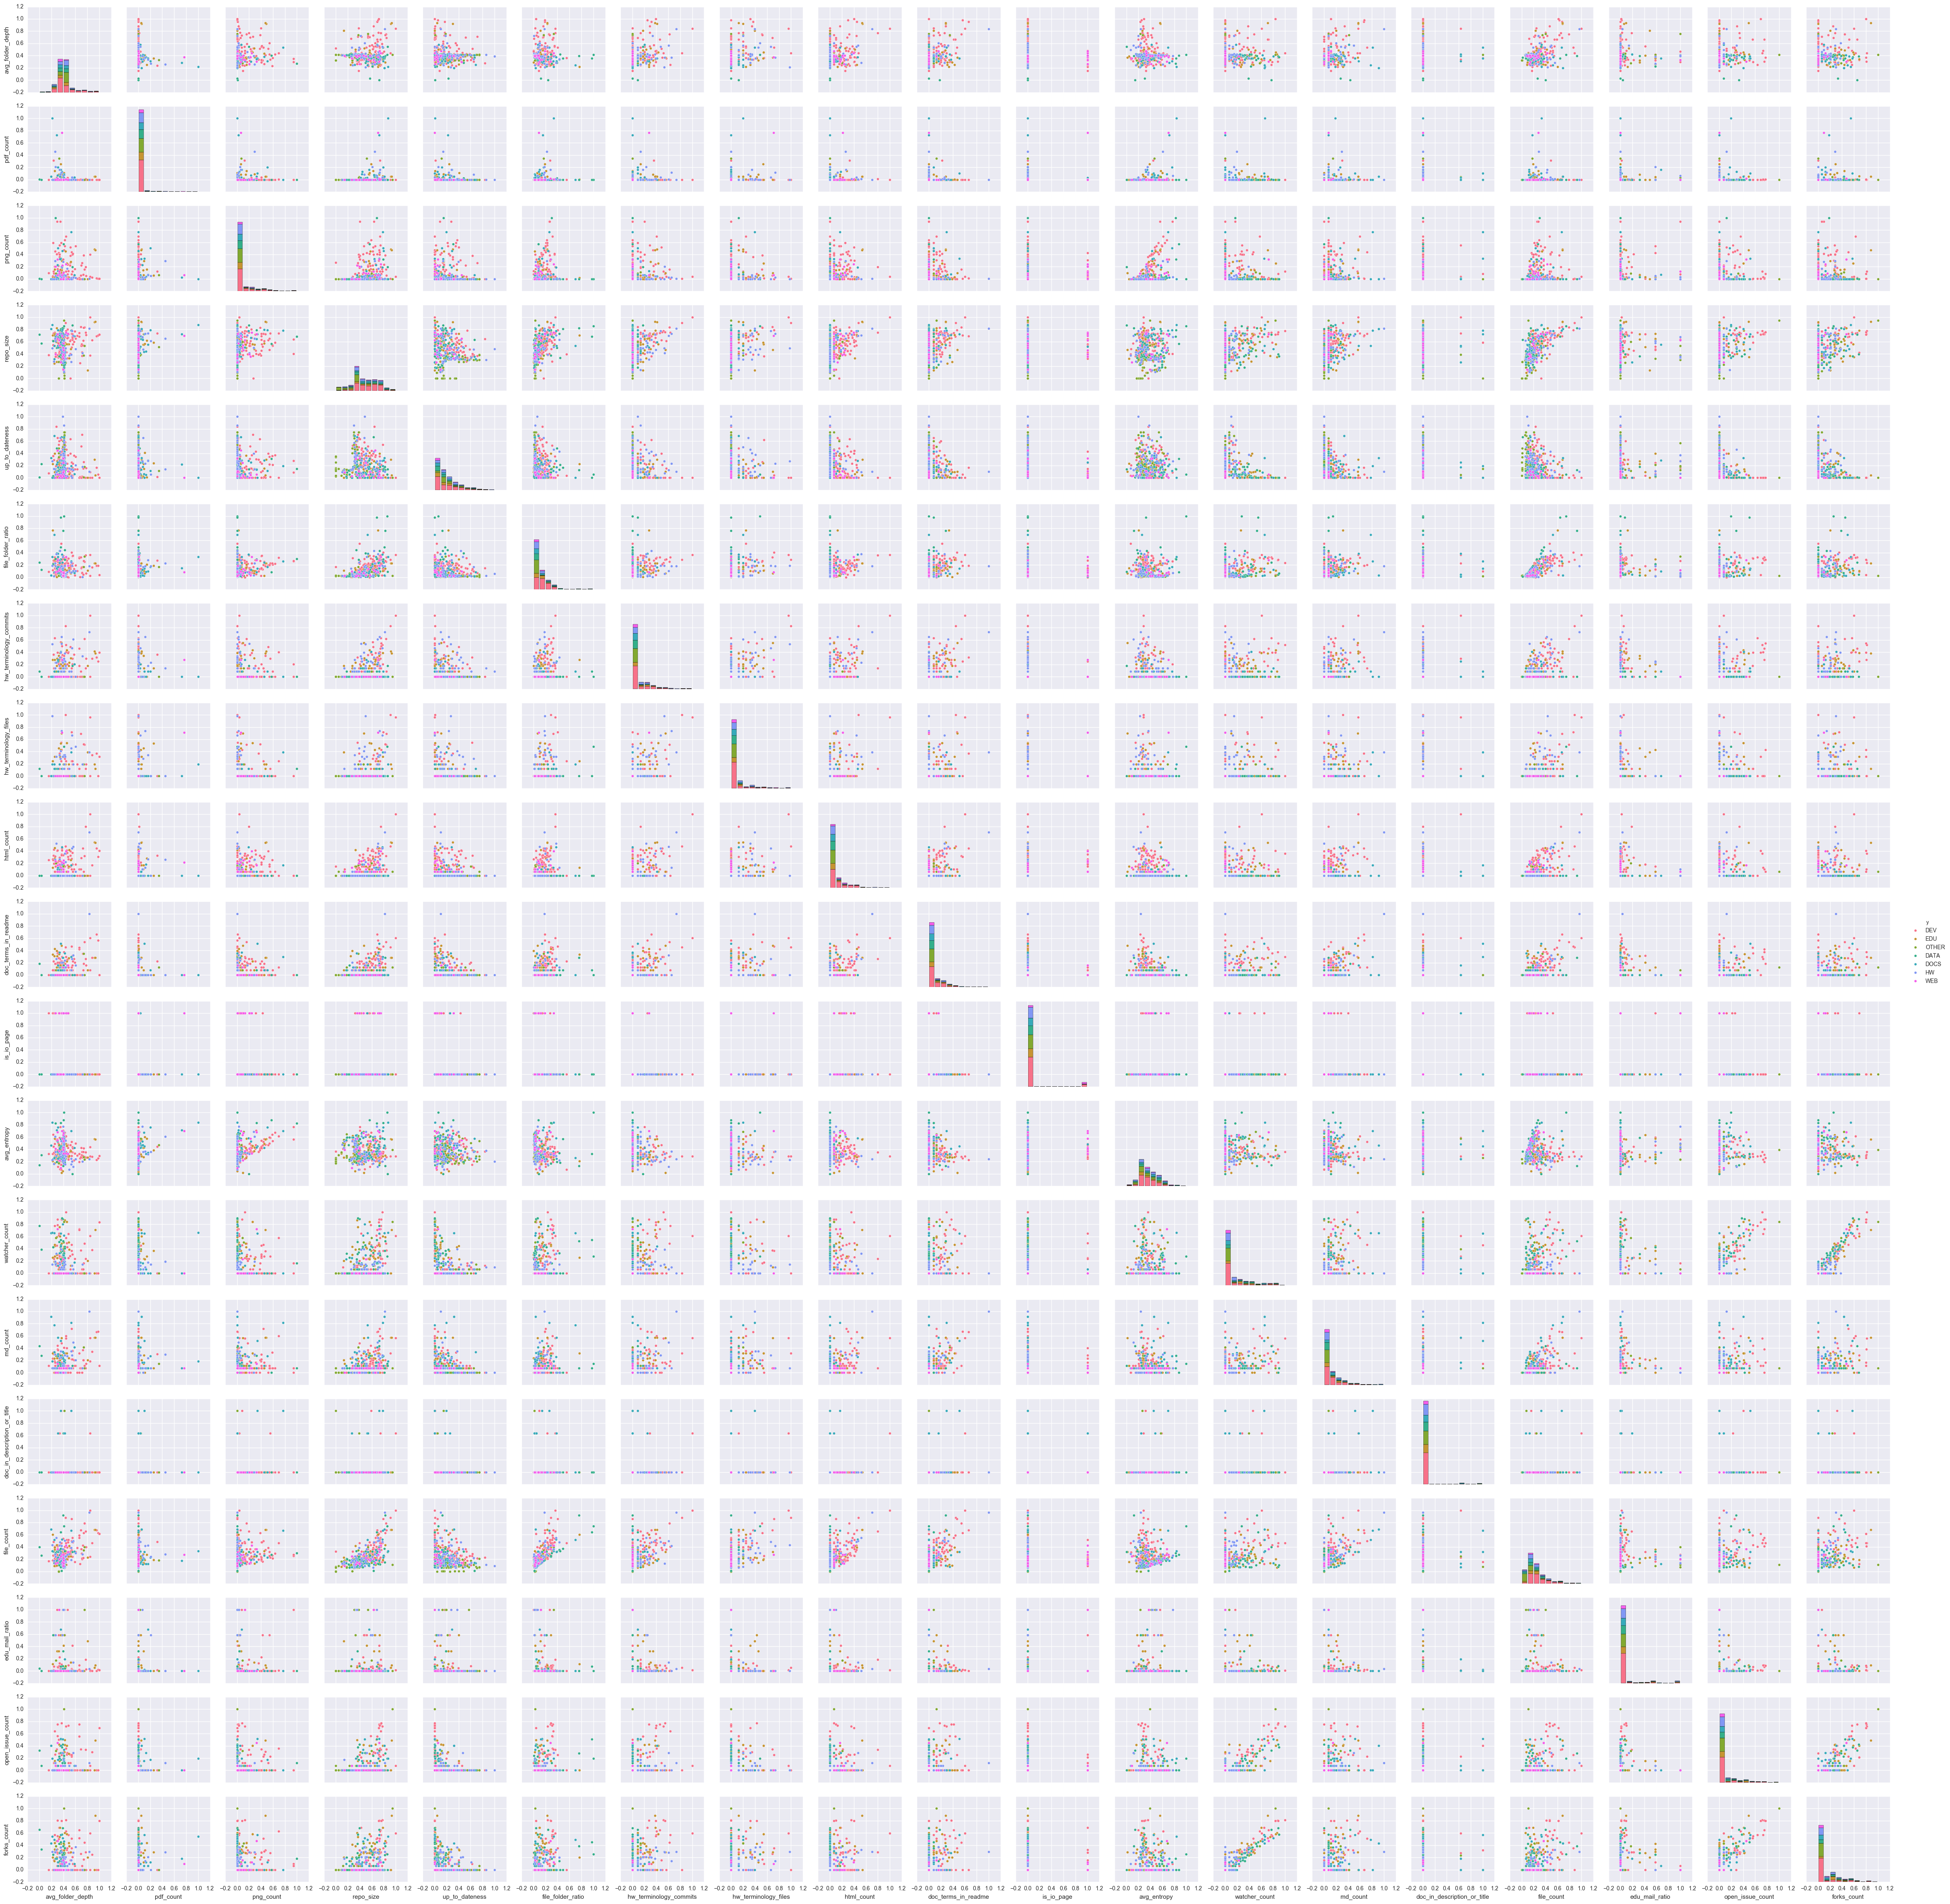

In [10]:
plot_data = X
plot_data['y'] = y
pplot = sbn.pairplot(plot_data, hue='y')
#pplot.savefig('colored_pairplot.png')

In [11]:
#fig = plt.figure(figsize=(16,8))
def bar_plots(data):
    f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

    index = np.arange(len(data))
    for i, metric in enumerate(metricCollection):
        ax = axarr[i]
        ax.bar(index,
            data[metric],
            0.7, # barwdith
            label=metric
        )
        ax.set_title(metric)

    plt.xticks(index + 0.35, index)
    None

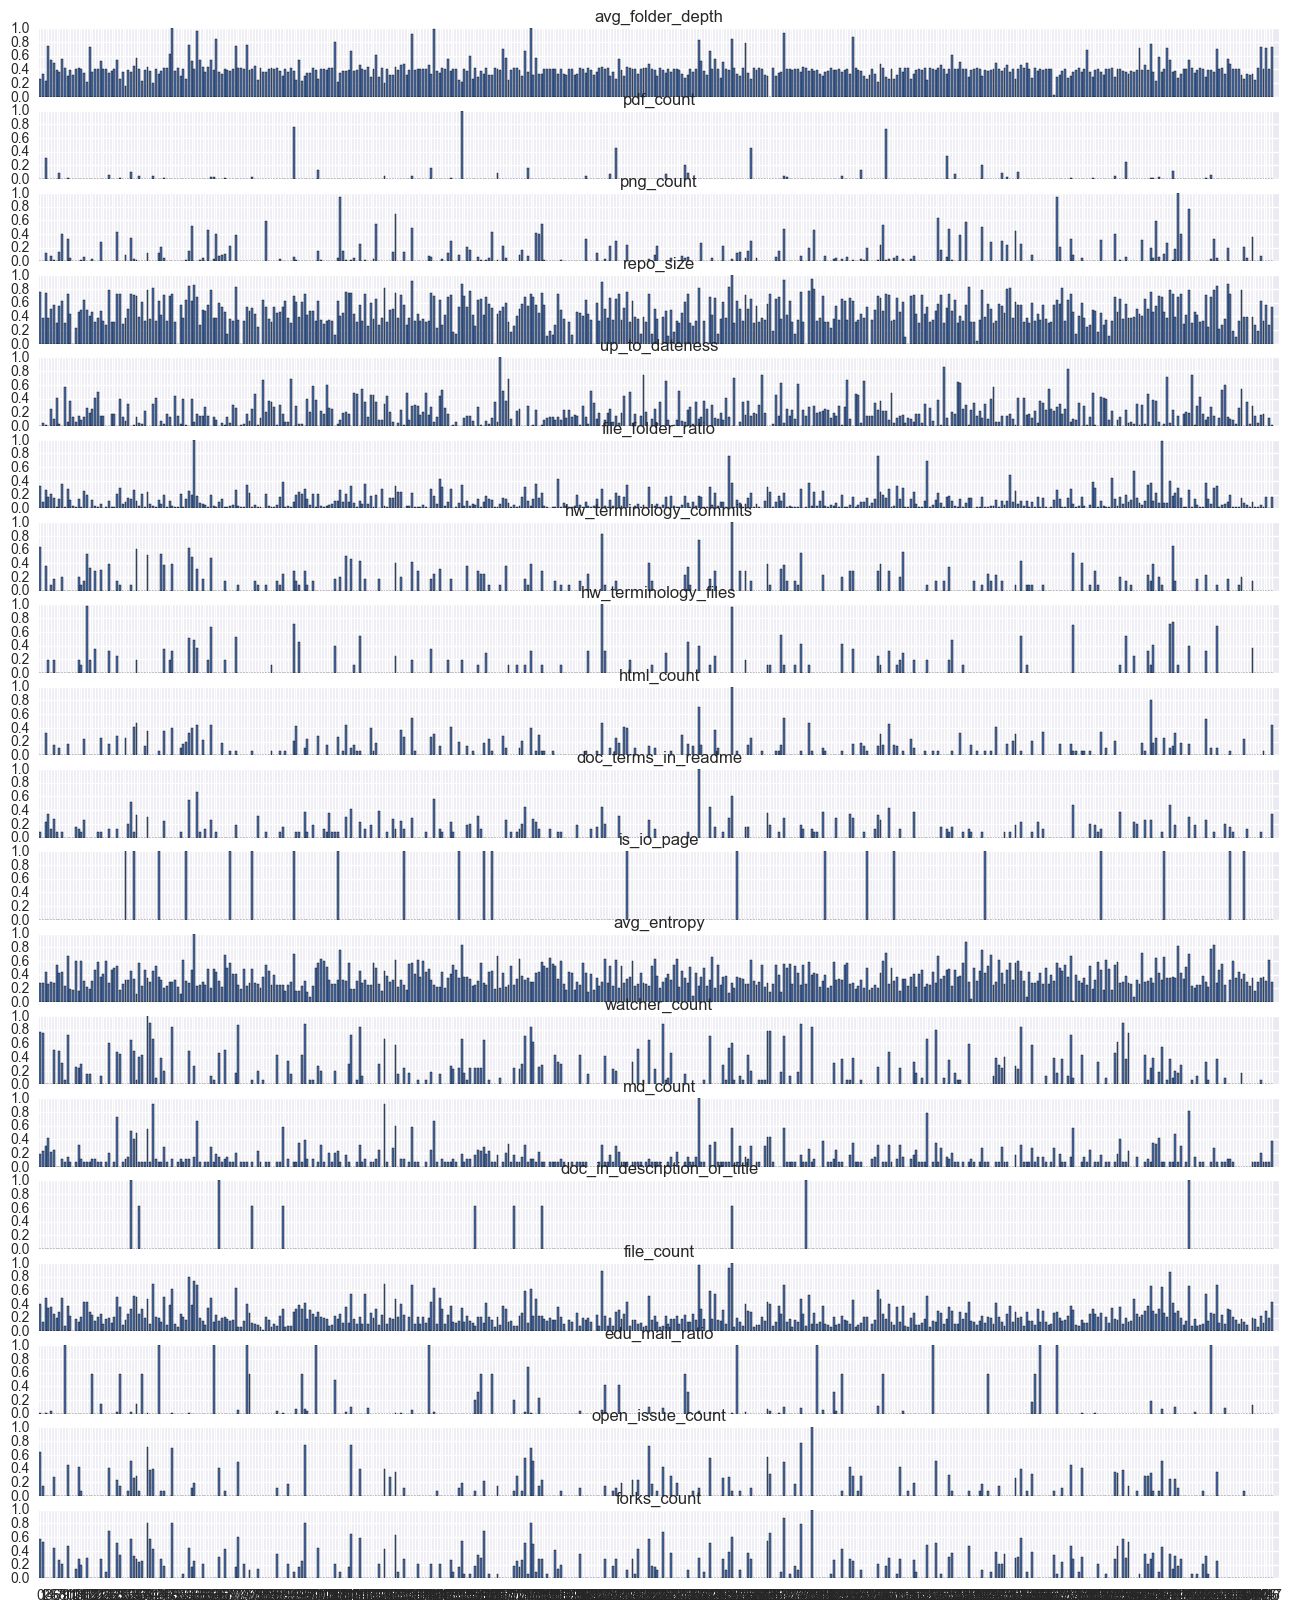

In [12]:
bar_plots(X)